In [2]:
# pip install deap

In [4]:
# pip install pymoo

In [1]:
from inference import EagleBlendPredictor
import numpy as np
import pandas as pd
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

In [ ]:
# eagle = EagleBlendPredictor()

In [2]:
# --- Placeholders for your existing code ---
# This is where your model and cost logic would be.
# For this example, we'll create simple dummy versions.

class EagleBlendOptimizer:
    """
    A dummy class to simulate your blend property predictor.
    It takes 5 component fractions and returns 10 dummy blend properties.
    """
    def predict_all(self, fractions):
        # In your real code, this calls your actual model.
        # Example: return self.model.predict(fractions.reshape(1, -1))
        print(f"Predicting for fractions: {np.round(fractions, 2)}")
        # Dummy logic: just return a function of the inputs
        return np.array([
            fractions[0] * 10 + fractions[1],
            fractions[1] * 12 + fractions[2],
            fractions[2] * 8 + fractions[3],
            fractions[3] * 15 + fractions[4],
            fractions[4] * 9 + fractions[0],
            np.sum(fractions * np.array([5, 2, 8, 4, 1])),
            np.sum(fractions * np.array([1, 6, 2, 9, 3])),
            np.max(fractions) * 100,
            np.min(fractions) * 50,
            np.mean(fractions) * 20,
        ])

def calculate_cost(fractions):
    """
    A dummy function to calculate the cost of a blend.
    In your real code, this would use the actual component costs.
    """
    # Example: Cost per unit for each of the 5 components
    component_costs = np.array([10.5, 12.0, 9.8, 15.2, 11.5])
    return np.dot(fractions, component_costs)

# --- End of Placeholders ---

🚀 Starting Optimization...
Predicting for fractions: [0.26 0.45 0.   0.19 0.09]
Predicting for fractions: [0.06 0.12 0.22 0.25 0.35]
Predicting for fractions: [0.19 0.31 0.09 0.4  0.01]
Predicting for fractions: [0.34 0.21 0.28 0.07 0.1 ]
Predicting for fractions: [0.22 0.27 0.09 0.19 0.24]
Predicting for fractions: [0.43 0.04 0.02 0.08 0.42]
Predicting for fractions: [0.04 0.16 0.35 0.2  0.26]
Predicting for fractions: [0.12 0.26 0.32 0.01 0.29]
Predicting for fractions: [0.34 0.26 0.1  0.27 0.04]
Predicting for fractions: [0.22 0.44 0.14 0.14 0.06]
Predicting for fractions: [0.01 0.41 0.13 0.16 0.29]
Predicting for fractions: [0.03 0.28 0.07 0.29 0.34]
Predicting for fractions: [0.06 0.25 0.41 0.25 0.03]
Predicting for fractions: [0.17 0.2  0.16 0.29 0.18]
Predicting for fractions: [0.38 0.06 0.06 0.34 0.17]
Predicting for fractions: [0.06 0.32 0.12 0.26 0.25]
Predicting for fractions: [0.31 0.22 0.26 0.12 0.09]
Predicting for fractions: [0.25 0.12 0.27 0.19 0.17]
Predicting for frac

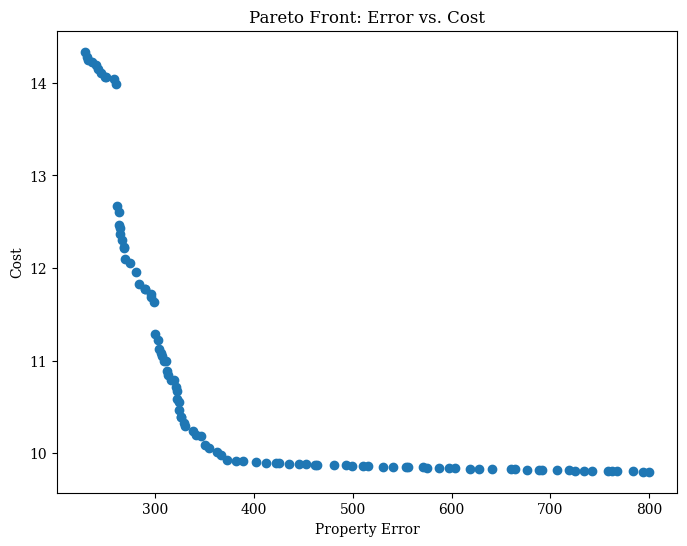

In [18]:
import numpy as np
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

# --- Placeholders for your existing code ---
# This is where your model and cost logic would be.
# For this example, we'll create simple dummy versions.

class EagleBlendOptimizer:
    """
    A dummy class to simulate your blend property predictor.
    It takes 5 component fractions and returns 10 dummy blend properties.
    """
    def predict_all(self, fractions):
        # In your real code, this calls your actual model.
        # Example: return self.model.predict(fractions.reshape(1, -1))
        print(f"Predicting for fractions: {np.round(fractions, 2)}")
        # Dummy logic: just return a function of the inputs
        return np.array([
            fractions[0] * 10 + fractions[1],
            fractions[1] * 12 + fractions[2],
            fractions[2] * 8 + fractions[3],
            fractions[3] * 15 + fractions[4],
            fractions[4] * 9 + fractions[0],
            np.sum(fractions * np.array([5, 2, 8, 4, 1])),
            np.sum(fractions * np.array([1, 6, 2, 9, 3])),
            np.max(fractions) * 100,
            np.min(fractions) * 50,
            np.mean(fractions) * 20,
        ])

def calculate_cost(fractions):
    """
    A dummy function to calculate the cost of a blend.
    In your real code, this would use the actual component costs.
    """
    # Example: Cost per unit for each of the 5 components
    component_costs = np.array([10.5, 12.0, 9.8, 15.2, 11.5])
    return np.dot(fractions, component_costs)

# --- End of Placeholders ---


class BlendOptimizationProblem(Problem):
    """
    This class defines the optimization problem for pymoo.
    """
    def __init__(self, target_properties, blend_model, optimize_cost=False):
        self.blend_model = blend_model
        self.target_properties = target_properties
        self.optimize_cost = optimize_cost
        
        # Determine the number of objectives
        n_obj = 2 if self.optimize_cost else 1
        
        super().__init__(
            n_var=5,          # 5 component fractions
            n_obj=n_obj,      # 1 or 2 objectives
            n_constr=1,       # 1 constraint (fractions must sum to 1)
            xl=0.0,           # Lower bound for each fraction is 0
            xu=1.0            # Upper bound for each fraction is 1
        )

    def _evaluate(self, x, out, *args, **kwargs):
        # 'x' is a numpy array of solutions from the GA population.
        # Each row in 'x' is one potential solution (a set of 5 fractions).
        
        # --- Constraint Handling ---
        # The sum of fractions must be 1. We enforce this here.
        # This is a robust way to handle this common constraint in GAs.
        sum_of_fractions = np.sum(x, axis=1, keepdims=True)
        normalized_fractions = x / sum_of_fractions

        # This sets the constraint violation. We want sum(x) - 1 to be 0.
        g1 = sum_of_fractions - 1.0
        out["G"] = g1

        # --- Objective Calculation ---
        # Prepare arrays to store the results for each solution in the population
        f1_errors = np.zeros(len(normalized_fractions))
        
        if self.optimize_cost:
            f2_costs = np.zeros(len(normalized_fractions))

        # Calculate objectives for each solution
        for i, fractions in enumerate(normalized_fractions):
            # 1. Get predicted properties from your model
            predicted_properties = self.blend_model.predict_all(fractions)
            
            # 2. Calculate Objective 1: Sum of Squared Errors
            error = np.sum((predicted_properties - self.target_properties)**2)
            f1_errors[i] = error
            
            # 3. (Optional) Calculate Objective 2: Cost
            if self.optimize_cost:
                cost = calculate_cost(fractions)
                f2_costs[i] = cost

        # Set the output for the optimizer
        if self.optimize_cost:
            out["F"] = np.column_stack([f1_errors, f2_costs])
        else:
            out["F"] = f1_errors


if __name__ == '__main__':
    # --- Configuration ---
    # 1. Instantiate your blend property prediction model
    blend_model = EagleBlendOptimizer()

    # 2. Define your target properties
    target_blend_properties = np.array([8.5, 10.2, 7.0, 12.5, 6.0, 4.5, 5.5, 80.0, 5.0, 4.0])
    
    # 3. Decide if you want to include cost in the optimization
    INCLUDE_COST = True

    # --- Setup and Run Optimization ---
    # 4. Initialize the problem definition
    problem = BlendOptimizationProblem(target_blend_properties, blend_model, optimize_cost=INCLUDE_COST)

    # 5. Configure the NSGA-II algorithm
    algorithm = NSGA2(
        pop_size=100,      # Population size - how many solutions to test at once
        eliminate_duplicates=True
    )

    # 6. Run the optimization
    print("🚀 Starting Optimization...")
    res = minimize(
        problem,
        algorithm,
        termination=('n_gen', 200), # Stop after 200 generations
        seed=1,
        verbose=True # Set to False for less console output
    )
    print("✅ Optimization Finished!")

    # --- Analyze Results ---
    print("\n--- Results ---")
    if res.X is not None:
        if INCLUDE_COST:
            # For multi-objective, res.X contains the Pareto front of solutions
            print(f"Found {len(res.X)} optimal trade-off solutions.")
            for i, (solution, objectives) in enumerate(zip(res.X, res.F)):
                normalized_sol = solution / np.sum(solution)
                print(f"Solution {i+1}:")
                print(f"  Fractions: {np.round(normalized_sol, 3)}")
                print(f"  Property Error (F1): {objectives[0]:.4f}")
                print(f"  Cost (F2): {objectives[1]:.2f}")
                print("-" * 10)
            
            # Plot the Pareto Front
            plot = Scatter(title="Pareto Front: Error vs. Cost", labels=["Property Error", "Cost"])
            plot.add(res.F)
            plot.show()

        else:
            # For single-objective, we have one best solution
            print("Found best solution:")
            normalized_sol = res.X / np.sum(res.X)
            print(f"  Fractions: {np.round(normalized_sol, 3)}")
            print(f"  Property Error: {res.F[0]:.4f}")
    else:
        print("No solution found.")

In [24]:
np.random.rand(50)

array([0.08748221, 0.22730974, 0.31437662, 0.17476588, 0.60709416,
       0.41358642, 0.81635151, 0.1851304 , 0.70187653, 0.24035562,
       0.57421909, 0.3489876 , 0.0569644 , 0.22881367, 0.66410256,
       0.49725009, 0.51901598, 0.17472015, 0.57071585, 0.99675343,
       0.81683511, 0.59437262, 0.97598907, 0.90156258, 0.59560793,
       0.03242633, 0.0935771 , 0.06537172, 0.45173315, 0.37543483,
       0.97535003, 0.16798329, 0.97278759, 0.76747487, 0.82423784,
       0.63261582, 0.66873277, 0.47688233, 0.01313636, 0.35300609,
       0.4920718 , 0.73009121, 0.46862834, 0.45740492, 0.13766274,
       0.01088873, 0.75827826, 0.31995284, 0.98438345, 0.22023423])

In [28]:
np.array(train_df.iloc[1:2, 5:-10]).flatten()

array([-0.22433918,  1.14803633, -1.10784018,  0.1495331 , -0.3540001 ,
       -1.07504117,  0.89283502,  1.36347342, -1.74368414,  1.27314409,
       -0.69108398, -0.25561959,  1.27077598, -0.33379821, -2.08652623,
       -1.86970948,  0.8962341 , -1.54120193, -0.24473688, -0.17538141,
       -0.37533976,  1.08196711, -0.01728136, -1.91370008, -0.43674725,
       -0.22214472,  0.34410928,  0.70336522, -0.73712103,  0.98864316,
       -1.20467052,  0.79578988,  0.24847661,  0.36654015,  0.1250721 ,
        0.94833762,  0.81262089, -0.57472438, -0.83760202,  0.63632852,
       -1.95882621, -0.01960284, -0.80792309,  0.14871469,  1.43931315,
       -1.16043482, -0.01427619, -0.13596762, -1.22115541,  0.89622217])

🚀 Starting Optimization...
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |      1 |  0.000000E+00 |  1.5445460023 |             - |             -
     2 |      200 |      3 |  0.000000E+00 |  0.8336532700 |  0.5567421609 |         ideal
     3 |      300 |      1 |  0.000000E+00 |  0.3524289089 |  4.3768848451 |         ideal
     4 |      400 |      2 |  0.000000E+00 |  0.0368876777 |  1.3766455807 |         ideal
     5 |      500 |      5 |  0.000000E+00 |  0.000000E+00 |  0.0037906650 |         ideal
     6 |      600 |      8 |  0.000000E+00 |  0.000000E+00 |  0.1133775480 |         ideal
     7 |      700 |     10 |  0.000000E+00 |  0.000000E+00 |  0.3380899327 |         ideal
     8 |      800 |     12 |  0.000000E+00 |  0.000000E+00 |  0.0185351835 |         ideal
     9 |      900 |     14 |  0.000000E+00 |  0.000000E+00 |  0.0261029261 |         ideal
    10 |     1000 |     17 |  0.000000E+00 |  0.000000E+00 |  0

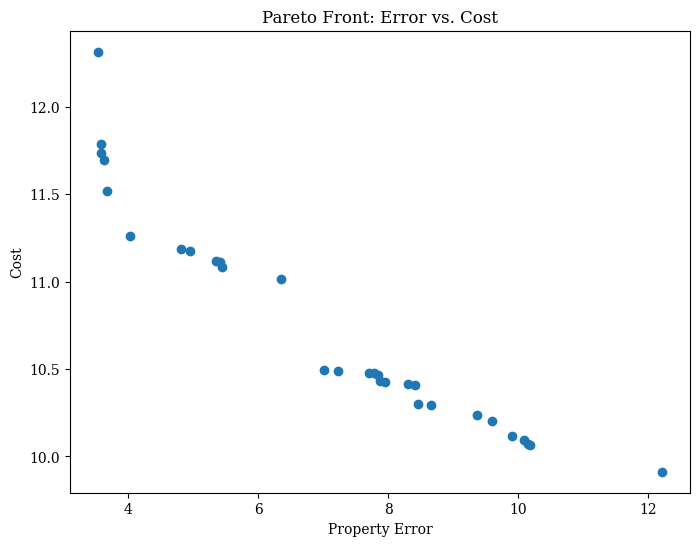

In [32]:
import numpy as np
import pandas as pd
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

# --- Components from Code A (or your actual project) ---
# Ensure EagleBlendPredictor is defined or imported here.
# For demonstration, a placeholder class is included.
# class EagleBlendPredictor:
#     """
#     This class should be your actual, trained model.
#     It must have a 'predict_df' method that accepts a DataFrame.
#     """
#     def predict_df(self, df: pd.DataFrame) -> pd.DataFrame:
#         # Dummy prediction logic: replace with your model's actual call
#         # e.g., return pd.DataFrame(self.model.predict(df), columns=output_cols)
#         num_rows = len(df)
#         # Create a dummy output that is sensitive to the inputs
#         # This simulates a model responding to the 5 variable fractions
#         blend_properties = np.zeros((num_rows, 10))
#         fractions = df.iloc[:, :5].values
#         for i in range(10):
#             # Make each property a slightly different combination of fractions
#             blend_properties[:, i] = np.sum(fractions * np.random.rand(5), axis=1) * (i + 5)
#         return pd.DataFrame(blend_properties, columns=[f'BlendProperty{i+1}' for i in range(10)])

def calculate_cost(fractions_df: pd.DataFrame) -> np.ndarray:
    """
    Cost function that takes a DataFrame of the variable fractions.
    (Copied directly from Code A)
    """
    component_costs = np.array([10.5, 12.0, 9.8, 15.2, 11.5])
    # Use dot product on the underlying numpy arrays for efficiency
    return fractions_df.values @ component_costs

# --- End of Imported Components ---


class BlendOptimizationProblem(Problem):
    """
    This class defines the optimization problem for pymoo.
    It preserves the structure of Code B but is adapted for the
    data handling of Code A.
    """
    def __init__(self,
                 blend_model,
                 target_properties: np.ndarray,
                 fixed_inputs: np.ndarray,
                 input_columns: list,
                 output_columns: list,
                 optimize_cost=False):

        self.blend_model = blend_model
        self.target_properties = target_properties
        self.fixed_inputs = fixed_inputs
        self.input_columns = input_columns
        self.output_columns = output_columns
        self.optimize_cost = optimize_cost

        # Determine the number of objectives
        n_obj = 2 if self.optimize_cost else 1

        super().__init__(
            n_var=5,        # 5 component fractions
            n_obj=n_obj,      # 1 or 2 objectives
            n_constr=1,       # 1 constraint (fractions must sum to 1)
            xl=0.0,         # Lower bound for each fraction is 0
            xu=1.0          # Upper bound for each fraction is 1
        )

    def _evaluate(self, x, out, *args, **kwargs):
        # 'x' is a numpy array of solutions from the GA population.
        # Each row in 'x' is one potential solution (a set of 5 fractions).

        # --- Constraint Handling ---
        # The sum of fractions must be 1. We enforce this here.
        sum_of_fractions = np.sum(x, axis=1, keepdims=True)
        # Avoid division by zero if a solution is all zeros
        sum_of_fractions[sum_of_fractions == 0] = 1
        normalized_fractions = x / sum_of_fractions

        # This sets the constraint violation. We want sum(x) - 1 to be 0.
        # Note: In Code A this was `np.abs(sum_of_fractions.flatten() - 1.0)`.
        # Preserving Code B's original `sum_of_fractions - 1.0` approach.
        g1 = sum_of_fractions - 1.0
        out["G"] = g1

        # --- Objective Calculation ---
        # Prepare arrays to store the results for each solution in the population
        f1_errors = np.zeros(len(normalized_fractions))

        if self.optimize_cost:
            f2_costs = np.zeros(len(normalized_fractions))

        # Calculate objectives for each solution (maintaining Code B's loop)
        for i, single_solution_fractions in enumerate(normalized_fractions):
            # --- ADAPTATION FOR CODE A's DATA STRUCTURE ---
            # 1. Construct the full 55-feature input for the model for this single solution
            full_input_data = np.hstack([single_solution_fractions, self.fixed_inputs])

            # 2. Create the DataFrame the model expects
            input_df = pd.DataFrame([full_input_data], columns=self.input_columns)

            # 3. Get predicted properties from your model
            predictions_df = self.blend_model.predict_df(input_df)
            predicted_properties = predictions_df[self.output_columns].values.flatten()
            
            # 4. Calculate Objective 1: Sum of Squared Errors
            error = np.sum((predicted_properties - self.target_properties)**2)
            f1_errors[i] = error

            # 5. (Optional) Calculate Objective 2: Cost
            if self.optimize_cost:
                # The cost function expects a DataFrame of fractions
                fractions_df = input_df.iloc[:, :5]
                cost = calculate_cost(fractions_df)[0] # result is an array, get the single value
                f2_costs[i] = cost

        # Set the output for the optimizer
        if self.optimize_cost:
            out["F"] = np.column_stack([f1_errors, f2_costs])
        else:
            out["F"] = f1_errors


if __name__ == '__main__':
    # --- Configuration (using data setup from Code A) ---
    # 1. Instantiate your blend property prediction model
    blend_model = EagleBlendPredictor()

    # 2. Define your target properties
    target_blend_properties = np.array(train_df.iloc[2][-10:]) #np.array([8.5, 10.2, 7.0, 12.5, 6.0, 4.5, 5.5, 80.0, 5.0, 4.0])

    # 3. The 50 fixed inputs (component properties, etc.)
    fixed_model_inputs = np.array(train_df.iloc[1:2, 5:-10]).flatten() # np.random.rand(50) # Using dummy data as in Code A example

    # 4. Define the column names for your model's input DataFrame
    variable_cols = df.columns[:5].to_list()  # Assuming first 5 columns are variable fractions
    fixed_cols = df.columns[5:55].to_list()  # Assuming next 50 columns are fixed inputs
    input_cols = variable_cols + fixed_cols
    output_cols = [f'BlendProperty{i+1}' for i in range(10)]

    # 5. Decide if you want to include cost in the optimization
    INCLUDE_COST = True

    # --- Setup and Run Optimization (structure from Code B) ---
    # 6. Initialize the problem definition with all required data
    problem = BlendOptimizationProblem(
        blend_model=blend_model,
        target_properties=target_blend_properties,
        fixed_inputs=fixed_model_inputs,
        input_columns=input_cols,
        output_columns=output_cols,
        optimize_cost=INCLUDE_COST
    )

    # 7. Configure the NSGA-II algorithm
    algorithm = NSGA2(
        pop_size=100,      # Population size - how many solutions to test at once
        eliminate_duplicates=True
    )

    # 8. Run the optimization
    print("🚀 Starting Optimization...")
    res = minimize(
        problem,
        algorithm,
        termination=('n_gen', 20), # Stop after 200 generations
        seed=1,
        verbose=True # Set to False for less console output
    )
    print("✅ Optimization Finished!")

    # --- Analyze Results (structure from Code B) ---
    print("\n--- Results ---")
    if res.X is not None and len(res.X) > 0:
        if INCLUDE_COST:
            # For multi-objective, res.X contains the Pareto front of solutions
            print(f"Found {len(res.X)} optimal trade-off solution(s).")
            # Show the best solution in terms of property error (as in Code A)
            best_by_error_idx = np.argmin(res.F[:, 0])
            best_solution = res.X[best_by_error_idx]
            best_objectives = res.F[best_by_error_idx]
            
            normalized_sol = best_solution / np.sum(best_solution)
            print("\n🏆 Best Solution (by smallest property error):")
            print(f"   Fractions: {np.round(normalized_sol, 4)}")
            print(f"   Property Error (Objective 1): {best_objectives[0]:.4f}")
            print(f"   Cost (Objective 2): {best_objectives[1]:.2f}")

            # Plot the Pareto Front
            plot = Scatter(title="Pareto Front: Error vs. Cost", labels=["Property Error", "Cost"])
            plot.add(res.F)
            plot.show()

        else:
            # For single-objective, we have one best solution
            print("Found best solution:")
            normalized_sol = res.X / np.sum(res.X)
            print(f"   Fractions: {np.round(normalized_sol, 3)}")
            print(f"   Property Error: {res.F[0]:.4f}")
    else:
        print("No solution found.")

In [40]:
pip install pymoo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



--- Results ---
Found 87 optimal trade-off solution(s) on the Pareto Front.

--- Solution #1 ---
   Fractions: [0.3467 0.0843 0.4987 0.     0.0703]
   Property Error (Objective 1): 7.8138
   Cost (Objective 2): 10.35

--- Solution #2 ---
   Fractions: [3.938e-01 6.020e-02 3.871e-01 1.587e-01 1.000e-04]
   Property Error (Objective 1): 4.5733
   Cost (Objective 2): 11.07

--- Solution #3 ---
   Fractions: [0.3002 0.0552 0.3944 0.2501 0.    ]
   Property Error (Objective 1): 3.1828
   Cost (Objective 2): 11.48

--- Solution #4 ---
   Fractions: [0.3668 0.0254 0.6051 0.     0.0027]
   Property Error (Objective 1): 9.1250
   Cost (Objective 2): 10.12

--- Solution #5 ---
   Fractions: [0.4114 0.0753 0.42   0.0932 0.    ]
   Property Error (Objective 1): 6.0211
   Cost (Objective 2): 10.76

--- Solution #6 ---
   Fractions: [0.3874 0.0534 0.3772 0.1821 0.    ]
   Property Error (Objective 1): 3.6296
   Cost (Objective 2): 11.17

--- Solution #7 ---
   Fractions: [4.164e-01 7.160e-02 4.492e

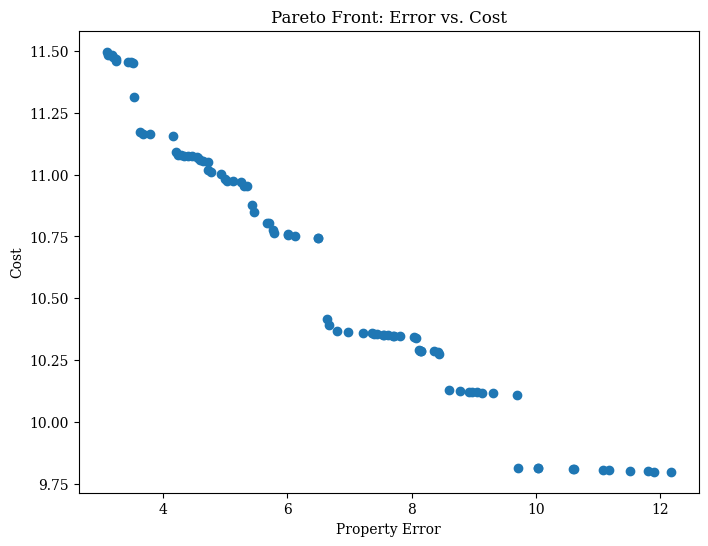

In [31]:
# --- Analyze Results (MODIFIED to show all solutions) ---
print("\n--- Results ---")
if res.X is not None and len(res.X) > 0:
    if INCLUDE_COST:
        print(f"Found {len(res.X)} optimal trade-off solution(s) on the Pareto Front.")
        
        # Loop through every solution found
        for i, (solution, objectives) in enumerate(zip(res.X, res.F)):
            # res.X contains the 5 fractions for a solution
            # res.F contains the [error, cost] objectives for that solution
            
            normalized_sol = solution / np.sum(solution)
            
            print(f"\n--- Solution #{i+1} ---")
            print(f"   Fractions: {np.round(normalized_sol, 4)}")
            print(f"   Property Error (Objective 1): {objectives[0]:.4f}")
            print(f"   Cost (Objective 2): {objectives[1]:.2f}")

        # The plot of the Pareto Front will still show
        plot = Scatter(title="Pareto Front: Error vs. Cost", labels=["Property Error", "Cost"])
        plot.add(res.F)
        plot.show()

In [4]:
import numpy as np
from pymoo.core.problem import Problem

# (Your EagleBlendOptimizer and other functions remain the same)

class BlendOptimizationProblem(Problem):
    def __init__(self, target_properties, blend_model, optimize_cost=False):
        self.blend_model = blend_model
        self.target_properties = target_properties
        self.optimize_cost = optimize_cost
        
        n_obj = 2 if self.optimize_cost else 1
        
        # --- KEY CHANGE 1 ---
        # We now have 3 constraints:
        # 1. The sum of fractions must be 1.0
        # 2. Property #3 must be 7.0
        # 3. Property #8 must be 80.0
        n_constraints = 3
        
        super().__init__(
            n_var=5,
            n_obj=n_obj,
            n_constr=n_constraints, # Updated number of constraints
            xl=0.0,
            xu=1.0
        )
        # Define a small tolerance for equality constraints
        self.epsilon = 1e-4

    def _evaluate(self, x, out, *args, **kwargs):
        # Normalize fractions to handle the sum-to-one requirement
        sum_of_fractions = np.sum(x, axis=1, keepdims=True)
        normalized_fractions = x / sum_of_fractions
        
        # Prepare arrays to store results
        objectives = []
        constraints = []
        
        # Evaluate each solution in the population
        for fractions in normalized_fractions:
            predicted_properties = self.blend_model.predict_all(fractions)
            # Reshape the 1D 'fractions' array into a 2D array for the model
            # fractions_2d = fractions.reshape(1, -1) 
            # predicted_properties = self.blend_model.predict_all(fractions_2d)
            
            # --- Objective Calculation (Now we exclude the frozen properties) ---
            # Create a mask to ignore the constrained properties in the error calculation
            error_mask = np.ones(10, dtype=bool)
            error_mask[[2, 7]] = False # Indices for Property #3 and Property #8
            
            error = np.sum((predicted_properties[error_mask] - self.target_properties[error_mask])**2)
            
            current_objectives = [error]
            if self.optimize_cost:
                current_objectives.append(calculate_cost(fractions))
            objectives.append(current_objectives)
            
            # --- KEY CHANGE 2 ---
            # Calculate the constraint violations
            # Pymoo expects g(x) <= 0 for a constraint to be met.
            
            # Constraint 1: sum(fractions) = 1
            g1 = np.sum(fractions) - 1.0 
            
            # Constraint 2: |P_3 - 7.0| - epsilon <= 0
            g2 = abs(predicted_properties[2] - 7.0) - self.epsilon
            
            # Constraint 3: |P_8 - 80.0| - epsilon <= 0
            g3 = abs(predicted_properties[7] - 80.0) - self.epsilon
            
            constraints.append([g1, g2, g3])

        # Assign results to the output dictionary
        out["F"] = np.array(objectives)
        out["G"] = np.array(constraints)

In [5]:

# --- Configuration ---
# 1. Instantiate your blend property prediction model
blend_model = EagleBlendOptimizer()   #EagleBlendPredictor()

# 2. Define your target properties
target_blend_properties = np.array([8.5, 10.2, 7.0, 12.5, 6.0, 4.5, 5.5, 80.0, 5.0, 4.0])

# 3. Decide if you want to include cost in the optimization
INCLUDE_COST = True

# --- Setup and Run Optimization ---
# 4. Initialize the problem definition
problem = BlendOptimizationProblem(target_blend_properties, blend_model, optimize_cost=INCLUDE_COST)

# 5. Configure the NSGA-II algorithm
algorithm = NSGA2(
    pop_size=10,      # Population size - how many solutions to test at once
    eliminate_duplicates=True
)

# 6. Run the optimization
print("🚀 Starting Optimization...")
res = minimize(
    problem,
    algorithm,
    termination=('n_gen', 200), # Stop after 200 generations
    seed=1,
    verbose=True # Set to False for less console output
)
print("✅ Optimization Finished!")

# --- Analyze Results ---
print("\n--- Results ---")
if res.X is not None:
    if INCLUDE_COST:
        # For multi-objective, res.X contains the Pareto front of solutions
        print(f"Found {len(res.X)} optimal trade-off solutions.")
        for i, (solution, objectives) in enumerate(zip(res.X, res.F)):
            normalized_sol = solution / np.sum(solution)
            print(f"Solution {i+1}:")
            print(f"  Fractions: {np.round(normalized_sol, 3)}")
            print(f"  Property Error (F1): {objectives[0]:.4f}")
            print(f"  Cost (F2): {objectives[1]:.2f}")
            print("-" * 10)
        
        # Plot the Pareto Front
        plot = Scatter(title="Pareto Front: Error vs. Cost", labels=["Property Error", "Cost"])
        plot.add(res.F)
        plot.show()

    else:
        # For single-objective, we have one best solution
        print("Found best solution:")
        normalized_sol = res.X / np.sum(res.X)
        print(f"  Fractions: {np.round(normalized_sol, 3)}")
        print(f"  Property Error: {res.F[0]:.4f}")
else:
    print("No solution found.")

🚀 Starting Optimization...
Predicting for fractions: [0.26 0.45 0.   0.19 0.09]
Predicting for fractions: [0.06 0.12 0.22 0.25 0.35]
Predicting for fractions: [0.19 0.31 0.09 0.4  0.01]
Predicting for fractions: [0.34 0.21 0.28 0.07 0.1 ]
Predicting for fractions: [0.22 0.27 0.09 0.19 0.24]
Predicting for fractions: [0.43 0.04 0.02 0.08 0.42]
Predicting for fractions: [0.04 0.16 0.35 0.2  0.26]
Predicting for fractions: [0.12 0.26 0.32 0.01 0.29]
Predicting for fractions: [0.34 0.26 0.1  0.27 0.04]
Predicting for fractions: [0.22 0.44 0.14 0.14 0.06]
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       10 |      1 |  4.140670E+01 |  4.867015E+01 |             - |             -
Predicting for fractions: [0.15 0.29 0.29 0.01 0.26]
Predicting for fractions: [0.68 0.06 0.03 0.11 0.12]
Predicting for fractions: [0.19 0.32 0.09 0.39 0.01]
Predicting for fractions: [0.21 0.47 0.16 0.14 0.03]
Predicting for fractions: [0.16 0.47 0.15 0.15 0.

In [ ]:
"""
EagleBlend Genetic Algorithm Optimizer
-------------------------------------
Full, self-contained Python implementation of a real-coded Genetic Algorithm (GA)
for minimizing the difference between model-predicted blend properties and a
set of target blend properties (10 targets). The script also supports an
optional cost objective and provides options for multi-objective optimization:
  - Scalarized single-objective GA (default)
  - Pareto-approximation by running scalarized GA with multiple weights
  - NSGA-II using DEAP (optional, if you have `deap` installed)

You must supply a small adapter function that maps a 5-element fractions vector
into the full input vector expected by your `EagleBlendOptimizer.predict_all`
(or a wrapper that calls it). This keeps the optimizer agnostic to your
model's internal input order.

How to use (short):
  1. Instantiate your EagleBlend class (from inference.py). Example name:
       eagle = EagleBlendOptimizer(...)
  2. Create a `prepare_input_fn(fractions: np.ndarray) -> np.ndarray` that for
     a single sample returns the full input vector for your model. If your
     model already takes fractions + other fixed features, this may simply be
     ``lambda f: np.concatenate([f, fixed_props])``.
  3. Call `ga_optimize_single_objective(...)` or `pareto_by_weight_sweep(...)`.

Notes and assumptions made here:
 - We assume the 5 component fractions must be non-negative and are best
   interpreted as composition fractions (we repair by normalizing them to sum
   to 1). If your use-case allows other constraints (e.g. <=1 but not summing
   to 1), tweak ``repair_and_normalize``.
 - We try to batch predictions for speed. If your model doesn't accept batch
   input, the wrapper will fall back to calling single-sample predictions.
 - Optional cost is handled either by scalarization (weighted sum) or
   by running multi-objective algorithms.

"""

In [34]:
df = pd.read_csv(r'C:\Users\Otto Henry\CodingWorld\Hackerthon\Fuel-Blend-Properties-Prediction\dataset\dataset\test.csv')
df = df.drop(columns=['ID'])
df.head()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,Component1_Property9,Component2_Property9,Component3_Property9,Component4_Property9,Component5_Property9,Component1_Property10,Component2_Property10,Component3_Property10,Component4_Property10,Component5_Property10
0,0.18,0.05,0.32,0.37,0.08,-0.177804,-0.741219,0.769821,-0.877069,0.602809,...,-0.265376,0.123432,0.028533,-0.173365,1.297923,0.323299,-0.315146,0.625518,-0.514342,-0.777057
1,0.00,0.50,0.00,0.37,0.13,2.501354,0.177344,-0.498739,-0.196742,-1.943463,...,-0.787677,-0.757905,-0.280561,-1.965970,0.543475,-0.906851,0.962341,-0.183757,0.310871,-1.329042
2,0.16,0.00,0.17,0.50,0.17,1.547324,0.891479,0.030627,-0.368678,-0.294728,...,-0.710026,-1.422693,0.874071,-1.016144,0.093525,1.048525,-1.321851,0.356640,-0.869543,-0.177255
3,0.50,0.00,0.17,0.16,0.17,-0.424427,1.016862,-1.182979,-0.854225,-0.830186,...,-0.551366,0.257105,-0.077337,-0.721031,-0.760365,-0.507690,1.346556,-0.001529,-1.008445,1.726105
4,0.00,0.00,0.50,0.50,0.00,-0.187062,-0.762173,-0.473660,2.074087,0.756849,...,-1.811468,-0.181223,-0.475933,0.234775,-0.909020,1.238203,-1.805664,0.980417,-1.354932,-0.657513


In [39]:
df.iloc[12:14, :].to_csv(r'C:\Users\Otto Henry\CodingWorld\Hackerthon\Fuel-Blend-Properties-Prediction\dev\assets\batch_template.csv', index=False)

In [7]:
train_df = pd.read_csv(r'C:\Users\Otto Henry\CodingWorld\Hackerthon\Fuel-Blend-Properties-Prediction\dataset\dataset\train.csv')

train_df.head()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,...,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,...,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,...,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,...,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,...,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,...,-0.118913,-1.172398,0.301785,-1.787407,-0.493361,-0.528049,0.286344,-0.265192,0.430513,0.735073


In [11]:
train_df.iloc[2][-10:]

BlendProperty1     1.784349
BlendProperty2     0.450467
BlendProperty3     0.622687
BlendProperty4     1.375614
BlendProperty5    -0.428790
BlendProperty6     1.161616
BlendProperty7     0.601289
BlendProperty8     0.872950
BlendProperty9     0.660000
BlendProperty10    2.024576
Name: 2, dtype: float64

In [16]:
train_df.iloc[1:2, 5:-10]

,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,Component1_Property2,Component2_Property2,Component3_Property2,Component4_Property2,Component5_Property2,...,Component1_Property9,Component2_Property9,Component3_Property9,Component4_Property9,Component5_Property9,Component1_Property10,Component2_Property10,Component3_Property10,Component4_Property10,Component5_Property10
1,-0.224339,1.148036,-1.10784,0.149533,-0.354,-1.075041,0.892835,1.363473,-1.743684,1.273144,...,-1.958826,-0.019603,-0.807923,0.148715,1.439313,-1.160435,-0.014276,-0.135968,-1.221155,0.896222


In [ ]:
import numpy as np
import pandas as pd
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

# --- Placeholders for your existing code ---

def calculate_cost(fractions_df: pd.DataFrame) -> np.ndarray:
    """
    Dummy cost function that now takes a DataFrame of the variable fractions.
    """
    component_costs = np.array([10.5, 12.0, 9.8, 15.2, 11.5])
    # Use dot product on the underlying numpy arrays for efficiency
    return fractions_df.values @ component_costs

# --- The Core of the New Pipeline ---

class BlendOptimizationProblem(Problem):
    """
    A sophisticated and flexible problem definition for pymoo.
    - Handles dynamic output constraints ("freezing").
    - Manages complex model inputs (5 variable + 50 fixed).
    - Works with DataFrame-based models.
    """
    def __init__(self,
                 blend_model,
                 target_properties: np.ndarray,
                 fixed_inputs: np.ndarray,
                 frozen_targets: dict,
                 input_columns: list,
                 output_columns: list,
                 optimize_cost=False):
        
        self.blend_model = blend_model
        self.target_properties = target_properties
        self.fixed_inputs = fixed_inputs
        self.frozen_targets = frozen_targets
        self.input_columns = input_columns
        self.output_columns = output_columns
        self.optimize_cost = optimize_cost

        # Dynamically determine the number of constraints
        # 1 permanent constraint (sum of fractions) + 1 for each frozen property
        n_constraints = 1 + len(self.frozen_targets)
        
        # Determine the number of objectives
        n_obj = 2 if self.optimize_cost else 1
        
        super().__init__(
            n_var=5,          # We are only optimizing the 5 fractions
            n_obj=n_obj,
            n_constr=n_constraints,
            xl=0.0,
            xu=1.0
        )
        
        # --- Pre-computation for efficiency ---
        self.epsilon = 1e-4 # Tolerance for "equals to" constraints
        
        # Get the indices and values of frozen properties
        self.frozen_indices = list(self.frozen_targets.keys())
        self.frozen_values = np.array(list(self.frozen_targets.values()))

        # Create a boolean mask to separate objectives from constraints
        self.objective_mask = np.ones(10, dtype=bool)
        self.objective_mask[self.frozen_indices] = False
        
        # Store a view of the targets that are part of the objective
        self.objective_targets = self.target_properties[self.objective_mask]

    def _evaluate(self, x, out, *args, **kwargs):
        # `x` is a numpy array from the GA population (e.g., shape=(100, 5))
        
        # 1. Normalize the 5 variable fractions to ensure they sum to 1
        sum_of_fractions = np.sum(x, axis=1, keepdims=True)
        normalized_fractions = x / sum_of_fractions

        # 2. Construct the full DataFrame for the model
        # Tile the fixed inputs to match the population size
        fixed_data = np.tile(self.fixed_inputs, (len(x), 1))
        # Combine variable fractions with fixed properties
        full_input_data = np.hstack([normalized_fractions, fixed_data])
        input_df = pd.DataFrame(full_input_data, columns=self.input_columns)

        # 3. Get predictions from the model
        predictions_df = self.blend_model.predict_df(input_df)
        predicted_properties = predictions_df[self.output_columns].values

        # 4. Calculate objectives
        # Use the pre-computed mask to calculate error ONLY for non-frozen properties
        error = np.sum((predicted_properties[:, self.objective_mask] - self.objective_targets)**2, axis=1)
        
        if self.optimize_cost:
            cost = calculate_cost(input_df.iloc[:, :5])
            out["F"] = np.column_stack([error, cost])
        else:
            out["F"] = error

        # 5. Calculate constraints
        # Constraint 1: The sum-to-one rule (as a violation)
        g1 = np.abs(sum_of_fractions.flatten() - 1.0)
        
        # Dynamic constraints for frozen properties
        if self.frozen_targets:
            # Calculate the violation for all frozen properties at once
            frozen_violations = np.abs(predicted_properties[:, self.frozen_indices] - self.frozen_values) - self.epsilon
            # Combine all constraints
            out["G"] = np.column_stack([g1, frozen_violations])
        else:
            out["G"] = g1

if __name__ == '__main__':
    # --- 1. DEFINE YOUR FULL PROBLEM SETUP ---

    # Your blend property prediction model
    blend_model = EagleBlendPredictor()  #Optimizer()

    # The 50 fixed inputs (component properties, etc.) - using dummy data
    # fixed_model_inputs = np.random.rand(50) 
    fixed_model_inputs = train_df.iloc[1:2, 5:-10]

    # Define the column names for your model's input DataFrame
    input_cols = df.columns.to_list()
    output_cols = [f'BlendProperty{i+1}' for i in range(10)]

    # Define the 10 ideal target values for all blend properties
    # full_target_properties = np.array([8.5, 10.2, 7.0, 12.5, 6.0, 4.5, 5.5, 80.0, 5.0, 4.0])
    full_target_properties = np.array(train_df.iloc[2][-10:])

    # --- 2. CONFIGURE THE OPTIMIZATION RUN ---

    # 🚀 DYNAMIC CONSTRAINTS: Specify which properties to freeze.
    # The key is the property index (0-9), the value is the target it must hit.
    # To run with NO frozen properties, just use an empty dictionary: {}
    frozen_targets_to_use = {
        # 2: 7.0,   # Freeze Property #3 at exactly 7.0
        # 7: 80.0   # Freeze Property #8 at exactly 80.0
    }
    # frozen_targets_to_use = {} # <-- UNCOMMENT THIS LINE TO RUN WITHOUT FREEZING

    # Decide if you want to include cost in the optimization
    INCLUDE_COST = True
    
    print("--- Optimization Configuration ---")
    print(f"Optimizing cost: {INCLUDE_COST}")
    if frozen_targets_to_use:
        print("Frozen Properties (Constraints):")
        for idx, val in frozen_targets_to_use.items():
            print(f"  - Property #{idx+1} must be {val}")
    else:
        print("No properties frozen. Minimizing error across all 10 properties.")
    print("-" * 30)

    # --- 3. SETUP AND RUN THE OPTIMIZER ---

    # Initialize the problem definition with all our settings
    problem = BlendOptimizationProblem(
        blend_model=blend_model,
        target_properties=full_target_properties,
        fixed_inputs=fixed_model_inputs,
        frozen_targets=frozen_targets_to_use,
        input_columns=input_cols,
        output_columns=output_cols,
        optimize_cost=INCLUDE_COST
    )

    algorithm = NSGA2(pop_size=20)

    res = minimize(
        problem,
        algorithm,
        termination=('n_gen', 200),
        seed=1,
        verbose=True
    )

    # --- 4. ANALYZE RESULTS ---
    print("\n--- ✅ Optimization Finished ---")
    if res.X is not None and len(res.X) > 0:
        # For multi-objective, res.X contains the Pareto front of solutions
        print(f"Found {len(res.X)} optimal trade-off solution(s).")
        # Let's show the best solution in terms of property error
        best_by_error_idx = np.argmin(res.F[:, 0])
        best_solution = res.X[best_by_error_idx]
        best_objectives = res.F[best_by_error_idx]

        normalized_sol = best_solution / np.sum(best_solution)
        print("\n🏆 Best Solution (by smallest property error):")
        print(f"  Fractions: {np.round(normalized_sol, 4)}")
        print(f"  Property Error (Objective 1): {best_objectives[0]:.4f}")
        if INCLUDE_COST:
            print(f"  Cost (Objective 2): {best_objectives[1]:.2f}")
        
        if INCLUDE_COST and len(res.X) > 1:
            plot = Scatter(title="Pareto Front: Error vs. Cost", labels=["Property Error", "Cost"])
            plot.add(res.F)
            plot.show()
    else:
        print("No feasible solution was found. Consider relaxing your constraints.")

--- Optimization Configuration ---
Optimizing cost: True
No properties frozen. Minimizing error across all 10 properties.
------------------------------
n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       20 |      1 |  0.5597437414 |  1.4293896380 |             - |             -
     2 |       40 |      1 |  0.3184219327 |  0.7861412077 |             - |             -
     3 |       60 |      1 |  0.0631483674 |  0.4702744966 |             - |             -
     4 |       80 |      1 |  0.0273588266 |  0.2356547289 |             - |             -
     5 |      100 |      1 |  0.0064014325 |  0.0814074538 |             - |             -
     6 |      120 |      1 |  0.0057489917 |  0.0419388661 |             - |             -
     7 |      140 |      1 |  0.0057489917 |  0.0257013179 |             - |             -
     8 |      160 |      1 |  0.0014036450 |  0.0158199340 |             - |             -
     9 |      180 |      1 |